<a href="https://colab.research.google.com/github/alfonso-uacj/ColabFiles/blob/main/PracticaRegresionLinealSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre: Lopez Rodriguez Alfonso
*   Matrícula: al256111

---|

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [3]:
# 1. Importa las bibliotecas necesarias.
import pandas as pd

# 2. Carga el archivo restaurantes.csv
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/restaurantes.csv')

# 3. Muestra las primeras filas del dataframe.
print("Primeras filas:\n")
print(df.head())

# 4. Describe estadísticamente el conjunto de datos
print("\nEstadística del conjunto de datos:\n")
print(df.describe(include='all'))


Primeras filas:

   poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233

Estadística del conjunto de datos:

       poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**

-Se ve segun el diagrama que si aumenta la poblacion, el profit tambien aumenta, se ve linealmente que mientras una variable sube la otra tambien y el grafico se ve ascendente de izquierda a derecha.

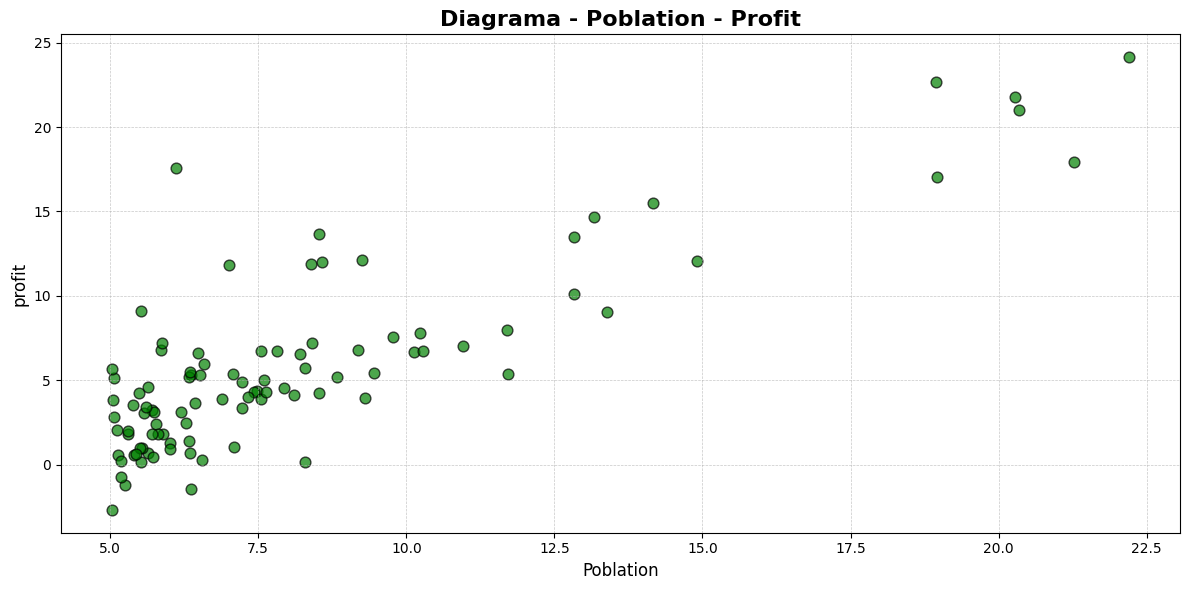

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer archivo
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/restaurantes.csv')

#formato
plt.figure(figsize=(12, 6))
plt.scatter(
    df['poblation'],
    df['profit'],
    c='green',
    edgecolor='black',
    s=60,
    alpha=0.7
)

# Títulos y etiquetas con estilo
plt.title('Diagrama - Poblation - Profit', fontsize=16, fontweight='bold')
plt.xlabel('Poblation', fontsize=12)
plt.ylabel('profit', fontsize=12)

# Rejilla y estilo
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación?

-Si la realacion se encuentra mas cercana a 1 indica que es fuerte la relacion, en este caso se cumple ya que el resultado es 0.838.

- ¿Es positiva o negativa?

-Es positiva porque tiende a acercarse a uno.

- ¿Es coherente con el gráfico anterior?

-Si corresponde con lo mostrado en el grafico.

In [11]:
import pandas as pd

# Leer archivo
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/restaurantes.csv')

# Calcular el coeficiente de correlación de Pearson
correlacion_pearson = df['poblation'].corr(df['profit'], method='pearson')

# Imprimir el resultado
print("Correlación de Pearson':", round(correlacion_pearson, 3))


Correlación de Pearson': 0.838


## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?
-Es un punto de referencia si la poblacion es cero, el resultado nos dice como referencia cual seria la perdida en el profit : -3.896.
4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?
-Indica el numoero que creceria de ganancia lineal por cada unidad (1) que aumente, en estte caso seria de 1.193

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Leer archivo
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/restaurantes.csv')

# Variables
X = df[['poblation']]  # + población
y = df['profit']       # + ganancia

# Crear y entrenar el modelo
modelo = LinearRegression() # libreria
modelo.fit(X, y)

# Obtener el intercepto y el coeficiente (pendiente)
intercepto = modelo.intercept_
pendiente = modelo.coef_[0]

# Imprimir resultados
print(f"Intercepto: {intercepto:.3f}")
print(f"Coeficiente: {pendiente:.3f}")


Intercepto: -3.896
Coeficiente: 1.193


### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

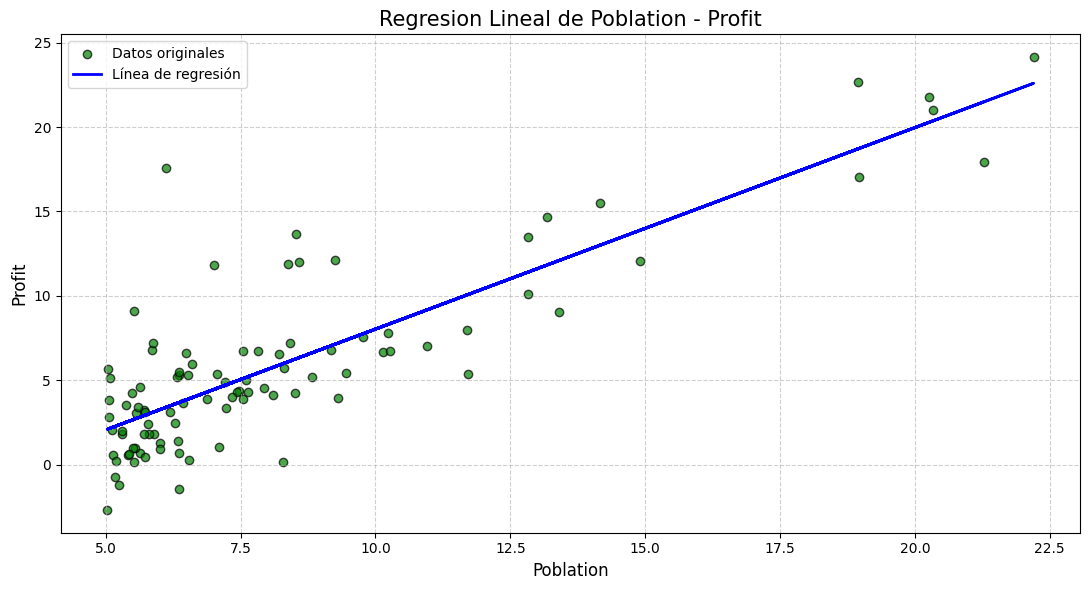

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Leer archivo
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/restaurantes.csv')

# Variables
X = df[['poblation']]  # + población
y = df['profit']       # + ganancia


modelo = LinearRegression() # libreria
modelo.fit(X, y)

# Predecir valores usando el modelo (para la línea de regresión)
y_pred = modelo.predict(X)

# Graficar los puntos originales
plt.figure(figsize=(11, 6))
plt.scatter(X, y, color='green', edgecolor='black', label='Datos originales', alpha=0.7)

# Graficar la línea de regresión
plt.plot(X, y_pred, color='blue', linewidth=2, label='Línea de regresión')

# Títulos y etiquetas
plt.title('Regresion Lineal de Poblation - Profit', fontsize=15)
plt.xlabel('Poblation', fontsize=12)
plt.ylabel('Profit', fontsize=12)

# Leyenda en rectangulo
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?

-Segun lo obtenido no se ve una distribucion normal perfecta, se ve sesgada hacia la izquierda con algunos valores outliers que sobresalen de la linea.

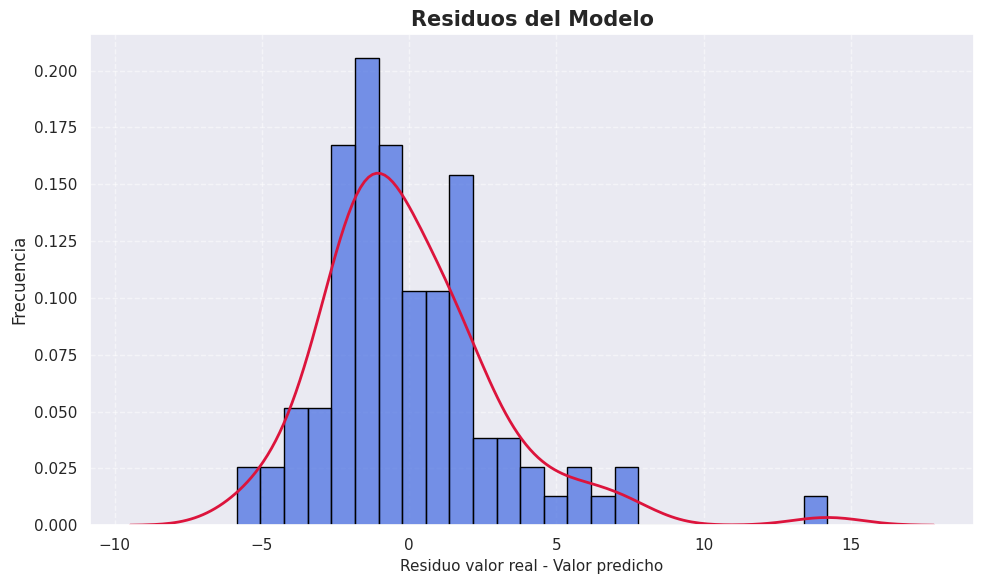

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


# Leer archivo
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/restaurantes.csv')

# Variables independientes y dependientes
X = df[['poblation']]
y = df['profit']

# Crear y entrenar el modelo sklearn
modelo = LinearRegression()
modelo.fit(X, y)

# Predicciones
ypre = modelo.predict(X)

# Calcular los residuos
residuos = y - ypre



sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
# Histograma
sns.histplot(residuos, bins=25, color='royalblue', edgecolor='black', stat='density', alpha=0.7)
sns.kdeplot(residuos, color='crimson', linewidth=2, label='Curva KDE')


# Titulos y etiquetas
plt.title('Residuos del Modelo', fontsize=15, fontweight='bold')
plt.xlabel('Residuo valor real - Valor predicho', fontsize=11)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?

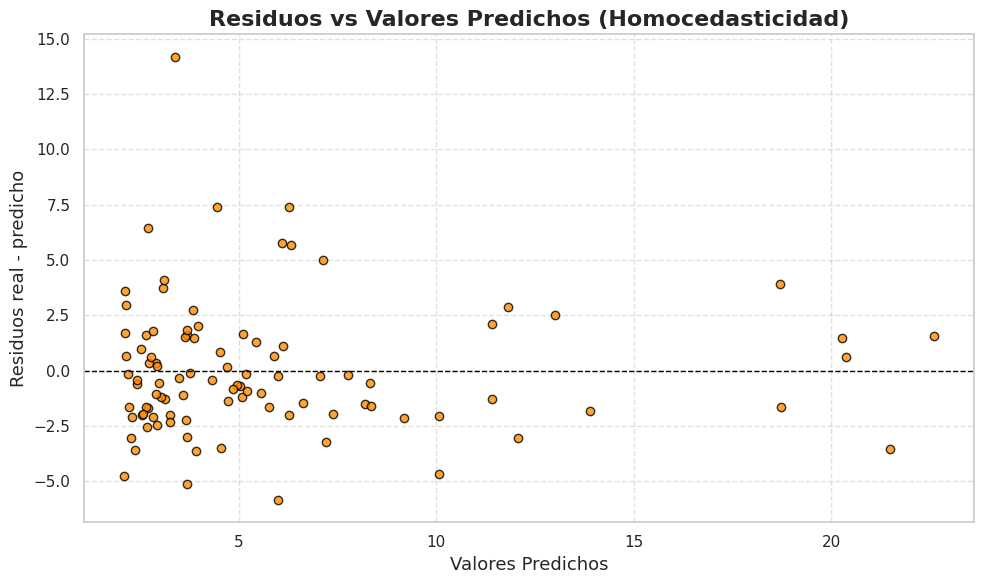

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Leer archivo
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/restaurantes.csv')

# modelo
X = df[['poblation']]
y = df['profit']
modelo = LinearRegression()
modelo.fit(X, y)
ypre = modelo.predict(X)

# Calcular residuos
residuos = y - ypre

# Estilo
sns.set(style='whitegrid')

# GRafica
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, color='darkorange', edgecolor='black', alpha=0.8)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Títulos y ejes
plt.title('Residuos vs Valores Predichos (Homocedasticidad)', fontsize=16, fontweight='bold')
plt.xlabel('Valores Predichos', fontsize=13)
plt.ylabel('Residuos real - predicho', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y b) Desviaciones sistemáticas indican asimetría o colas pesadas.

-Poblacion no sigue una distribucion nomral, esatn muy separados los puntos de la linea. Profit se acerca mas a la normalidad con valores centrales y extermos fuera.

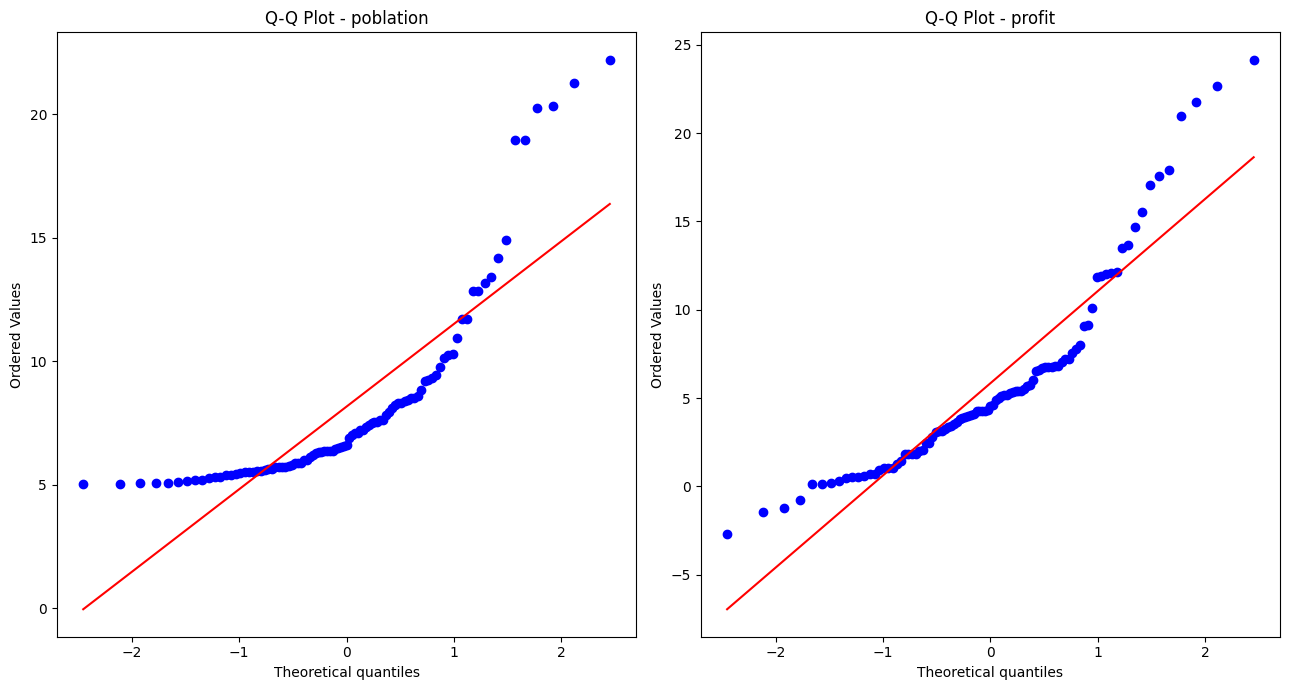

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Leer archivo
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/restaurantes.csv')

#subplot
fig, axs = plt.subplots(1, 2, figsize=(13, 7))

# Q-Q Plot para 'poblation'
stats.probplot(df['poblation'].dropna(), dist="norm", plot=axs[0])
axs[0].set_title('Q-Q Plot - poblation')

# Q-Q Plot para 'profit'
stats.probplot(df['profit'].dropna(), dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot - profit')

# GRafica
plt.tight_layout()
plt.show()

## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?

-Parece indicar un buen ajuste. EL MSE (media del cuadrado de los errores)  nos dio como resultado 8.954 entre valores reales y ls que se predijeron. El RMSE nos indica el error promedio del modelo que casi llega a 3 unidades en este caso. Se sopone con el R2 nos dice qeu el profit es explicada en su variablidad hasta aproximadamente un 70% por poblacion.

In [7]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Leer archivo
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/restaurantes.csv')


from sklearn.linear_model import LinearRegression

X = df[['poblation']]
y_real = df['profit']

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X, y_real)

# Predicciones
y_prediccion = modelo.predict(X)

# Calcular métricas
mse = mean_squared_error(y_real, y_prediccion)
rmse = np.sqrt(mse)
r2 = r2_score(y_real, y_prediccion)

# Mostrar resultados
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


MSE: 8.954
RMSE: 2.992
R²: 0.702


## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo?

Este modelo es muy util para darnos cuenta si de manera lineal una variable puede verse afectada por otra. Podemos ver los residuos y errores que nos dejan entender un poco mas los datos al entrenar el modelo con sklearn.

- ¿Qué limitaciones encuentras?

Solo vemos como afecta una variable a otra pudiendo dejar fuera otras variables que afcten el modelo.

- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.

-Se podrian ajustar los datos pero sigue siendo la comparativa entre profit y poblation.